In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import chardet
import os

# 1. Construct the correct file path (important!)
# Using os.path.abspath and os.path.join is best practice for relative paths
file_path = os.path.abspath(os.path.join("./../../Dataset/spam.csv"))

# Check if the file exists (good practice):
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# 2. Detect and use the correct encoding:
try:
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File read successfully with encoding: {encoding}")  # Confirmation

except UnicodeDecodeError:
    print(f"Error with detected encoding: {encoding}. Trying 'latin-1' as a fallback.")
    try:
      df = pd.read_csv(file_path, encoding='latin-1', errors='replace')
      print("File read successfully with encoding: latin-1 (with replacements)")
    except UnicodeDecodeError:
      print("Still having trouble. Trying 'utf-8' with replacements.")
      df = pd.read_csv(file_path, encoding='utf-8', errors='replace')
      print("File read successfully with encoding: utf-8 (with replacements)")
except FileNotFoundError as e:
    print(e)
    df = None # or handle it as you see fit

if df is not None: # only proceed if the dataframe was actually loaded
    # 3. Now you can work with your DataFrame:
    print(df.head())  # Print the first few rows to verify
    # ... your code to process the DataFrame ...

File read successfully with encoding: Windows-1252
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df = pd.read_csv("./../../Dataset/spam.csv", encoding="ISO-8859-1")

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1': 'spam', 'v2': 'sms'}, inplace=True)
df.head()

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df[df.duplicated() == True]

,spam,sms
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [9]:
df.drop_duplicates(inplace=True)
df

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### EDA

In [11]:
df['spam'].value_counts()

spam
ham     4516
spam     653
Name: count, dtype: int64

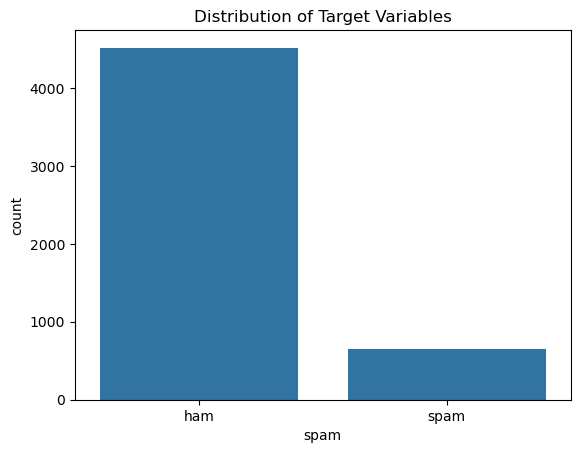

In [12]:
sns.countplot(x='spam', data=df).palette=['darkblue', 'orange']
plt.title('Distribution of Target Variables')
plt.show()

### Encoding

In [14]:
df['spam'] = df['spam'].map({'spam': 1, 'ham': 0})
df.head()

,spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Text Processing

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
import nltk

In [17]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
print(nltk.corpus.stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [19]:
ps = PorterStemmer()

def clean_tokenized_sentence(s):
    # Create empty string to store processed sentence.
    cleaned_s = ""

    words = nltk.word_tokenize(s)

    for word in words:
        # Convert to lowercase
        c_word = word.lower()

        # Remove stopwords and punctuations
        if c_word != '' and c_word not in nltk.corpus.stopwords.words('english') and c_word.isalnum():
            # Append the stemmed word into cleaned sms
            cleaned_s = cleaned_s + " " + ps.stem(c_word)

    return(cleaned_s.strip())

In [20]:
df['cleaned_sms'] = df['sms'].apply(clean_tokenized_sentence)

In [21]:
df.head()

,spam,sms,cleaned_sms
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


### Frequent Words

In [23]:
ham = df[df['spam'] == 0]['cleaned_sms']
spam = df[df['spam'] == 1]['cleaned_sms']

In [24]:
spam

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send 87...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: cleaned_sms, Length: 653, dtype: object

In [25]:
ham = " ".join(ham)
spam = " ".join(spam)

In [26]:
spam

'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call 09061701461 claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send 87575 cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jer

In [27]:
ham = ham.split(' ')
spam = spam.split(' ')

In [28]:
spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 '

In [29]:
from collections import Counter

df_ham = Counter(ham).most_common(20)
df_spam = Counter(spam).most_common(20)

In [30]:
df_ham

[('u', 892),
 ('go', 404),
 ('get', 349),
 ('2', 290),
 ('gt', 288),
 ('lt', 287),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('ok', 233),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165)]

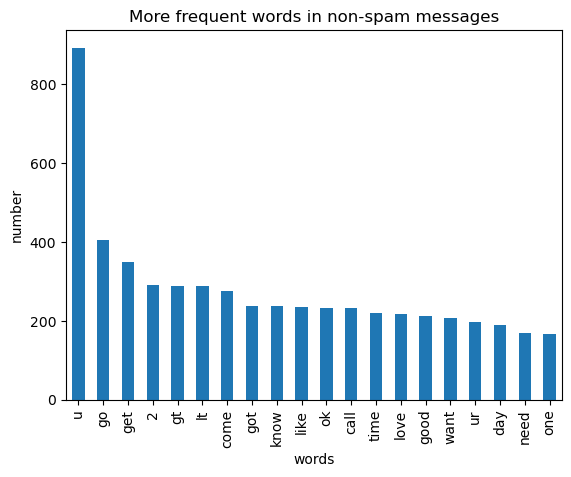

In [31]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(df_ham)



# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()



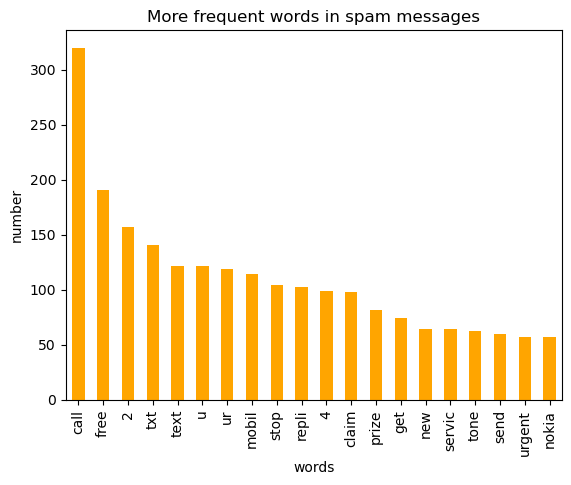

In [32]:
df_spam = pd.DataFrame(df_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()


## Multinomial Naive Bayes

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['cleaned_sms'], df['spam'], 
                                                    test_size=0.25, 
                                                    random_state=42)  # 80% train, 20% test

#CountVectorizer
c = CountVectorizer()
x_train = c.fit_transform(x_train)
x_test = c.transform(x_test)

print(x_train.shape, x_test.shape)
# print(y_train.shape, y_test.shape)
y_train.shape, y_test.shape

(3876, 5764) (1293, 5764)


((3876,), (1293,))

In [76]:
from imblearn.over_sampling import SMOTE

# to tacke data imbalance
smote = SMOTE(random_state=2)

x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

x_train_bal.shape, y_train_bal.shape

((6818, 5764), (6818,))

In [80]:
params = {
    'alpha': [0.01, 0.1, 1, 10]
}

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [86]:
model = MultinomialNB()

clf = GridSearchCV(model, param_grid=params, cv = 5, scoring='f1')
clf.fit(x_train_bal, y_train_bal)

res = clf.cv_results_

In [90]:
clf.best_params_, clf.best_score_

({'alpha': 0.1}, 0.8341029812797741)

In [92]:
model = MultinomialNB(alpha = 0.01)
model.fit(x_train_bal, y_train_bal)

y_pred = model.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print(classification_report(y_test, y_pred), f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1107
           1       0.86      0.89      0.87       186

    accuracy                           0.96      1293
   macro avg       0.92      0.93      0.93      1293
weighted avg       0.96      0.96      0.96      1293
 0.8736842105263158


## Gaussian Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [101]:
model = GaussianNB()

model.fit(x_train_bal.toarray(), y_train_bal)

y_pred = model.predict(x_test.toarray())

#### Why are we using  toarray() here ?

The `toarray()` method is used in your code because the `x_train_bal` and `x_test` variables likely represent sparse matrices, and the Gaussian Naive Bayes model expects dense NumPy arrays as input.

Here's a breakdown:

* **Sparse Matrices:**
    * In many machine learning tasks, especially those involving text data (like using TF-IDF or CountVectorizer), the feature matrices can be very large but contain mostly zero values. These are called sparse matrices.
    * Sparse matrices are stored in a way that efficiently represents only the non-zero values, saving memory and computation time.
    * Common sparse matrix formats include CSR (Compressed Sparse Row) and CSC (Compressed Sparse Column).
* **Gaussian Naive Bayes and Dense Arrays:**
    * The Gaussian Naive Bayes implementation in scikit-learn is designed to work with dense NumPy arrays.
    * It calculates the mean and standard deviation of each feature, which is more efficient when the data is stored in a dense format.
* **`toarray()` Conversion:**
    * The `toarray()` method converts a sparse matrix into a dense NumPy array.
    * By calling `x_train_bal.toarray()` and `x_test.toarray()`, you are transforming the sparse matrices into the dense format that Gaussian Naive Bayes expects.

**Why this is important:**

* **Compatibility:**
    * Without the `toarray()` conversion, the Gaussian Naive Bayes model would likely raise an error because it wouldn't be able to process the sparse matrix format.
* **Correct Calculations:**
    * The underlying calculations of the Gaussian Naive Bayes algorithm are designed to work with dense arrays. Converting the sparse matrix ensures that the calculations are performed correctly.
* **Memory Considerations:**
    * It is very important to be aware that converting very large sparse matrices to dense arrays can consume a very large amount of memory. If your sparse matrix is extremely large, converting it to a dense array could cause your program to run out of memory. In those cases, it may be better to consider algorithms that can handle sparse matrices directly, or to use dimensionality reduction techniques.

In summary, `toarray()` is used to bridge the gap between the sparse matrix representation of your data and the dense array format required by the Gaussian Naive Bayes algorithm.


In [109]:
print(classification_report(y_test, y_pred), f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1107
           1       0.54      0.87      0.66       186

    accuracy                           0.87      1293
   macro avg       0.76      0.87      0.79      1293
weighted avg       0.91      0.87      0.88      1293
 0.6625514403292181
